### 1- Importation des librairies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split

### 2- Chargement des données d'un fichier CSV avec Pandas:

In [2]:
train=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\GENIE LOGICIEL S4\UNSW_NB15.csv')

### 3- Résumé sur l'ensemble de données

In [3]:
train.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [4]:
train.shape

(175341, 45)

In [5]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [6]:
# permet de voir les colonnes 
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
train = train.replace('-', pd.NA).dropna()

In [8]:
train.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
22,23,0.964656,tcp,ftp,CON,14,12,690,950,25.915974,...,1,2,1,1,0,2,1,0,Normal,0
28,29,0.546425,tcp,http,FIN,10,8,1168,1040,31.111315,...,1,2,0,0,1,1,8,0,Normal,0
30,31,0.725996,tcp,http,FIN,10,16,822,12220,34.435451,...,1,2,0,0,1,2,1,0,Normal,0
31,32,0.274605,tcp,http,FIN,10,6,1228,268,54.623913,...,1,4,0,0,1,1,8,0,Normal,0
32,33,0.337456,tcp,http,FIN,10,8,800,2260,50.376940,...,1,1,0,0,1,1,8,0,Normal,0


In [9]:
train.shape

(81173, 45)

In [10]:
print(train['proto'])

3         tcp
11        tcp
15        udp
17        tcp
21        tcp
         ... 
175335    udp
175336    udp
175338    udp
175339    udp
175340    udp
Name: proto, Length: 81173, dtype: object


In [11]:
value_counts_result = train['proto'].value_counts()

# Afficher le résultat complet, même s'il y a beaucoup de données
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(value_counts_result)

proto
udp    47435
tcp    33738
Name: count, dtype: int64


attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64

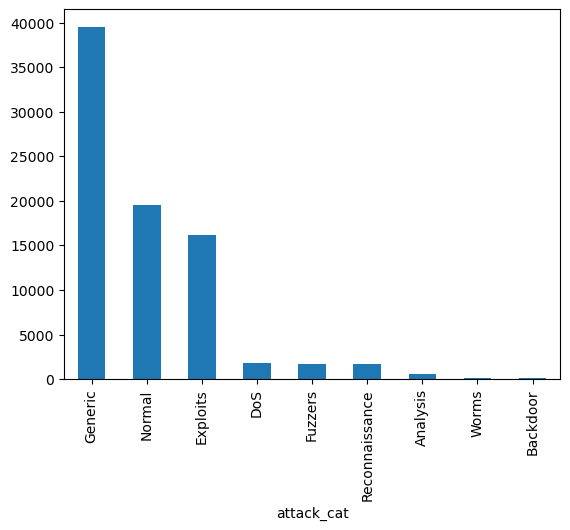

In [12]:
train["attack_cat"].value_counts().plot.bar()
train['attack_cat'].value_counts()

([<matplotlib.patches.Wedge at 0x21954cb5f10>,
 [Text(-0.7532028705720235, -0.8016766403993968, 'Attaque'),
  Text(0.7532028330428306, 0.801676675659367, 'Normal')],
 [Text(-0.41083792940292185, -0.43727816749058007, '76.0%'),
  Text(0.41083790893245303, 0.437278186723291, '24.0%')])

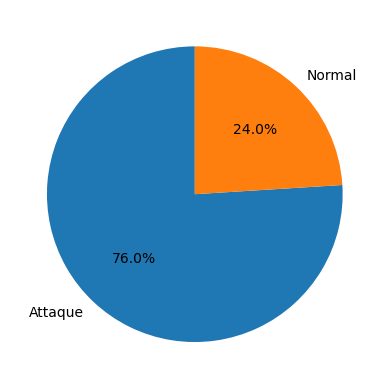

In [13]:
# Définissez les étiquettes pour les valeurs 0 et 1
labels = ['Attaque', 'Normal']
value_counts = train["label"].value_counts(normalize=True) 
# Créez le diagramme circulaire avec les étiquettes
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)

state
INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: count, dtype: int64

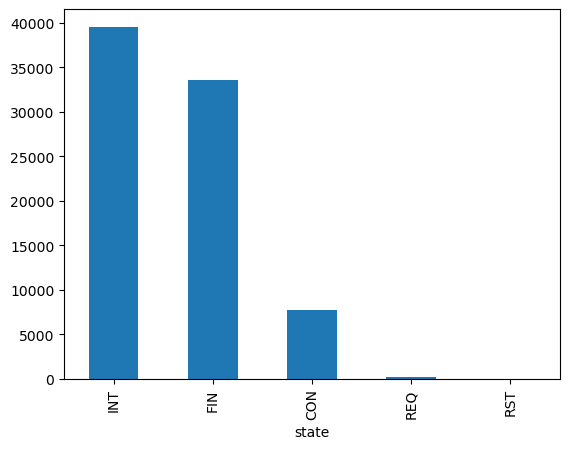

In [14]:
train["state"].value_counts().plot.bar()
train['state'].value_counts()

service
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64

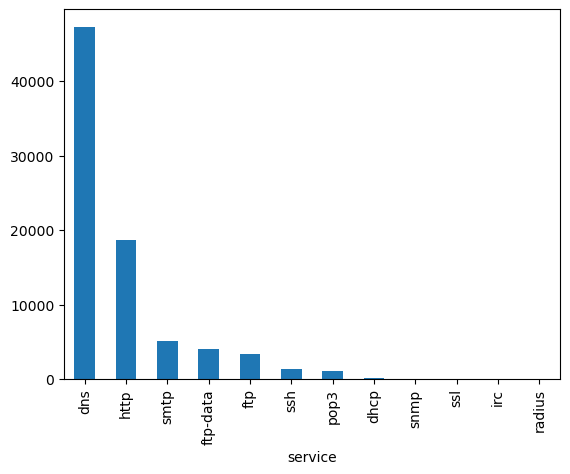

In [15]:
train["service"].value_counts().plot.bar()
train['service'].value_counts()

In [16]:
# explorer les caractéristiques catégorielles
print('Ensemble d\'entraînement:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("La caractéristique '{col_name}' a {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Ensemble d'entraînement:
La caractéristique 'proto' a 2 categories
La caractéristique 'service' a 12 categories
La caractéristique 'state' a 5 categories
La caractéristique 'attack_cat' a 9 categories


In [17]:
train = train.drop(columns=['attack_cat'])

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['proto', 'service', 'state']

train_categorical_values = train[categorical_columns]
print(train_categorical_values.head())

   proto service state
3    tcp     ftp   FIN
11   tcp    smtp   FIN
15   udp    snmp   INT
17   tcp    http   FIN
21   tcp    http   FIN


In [19]:
train_enc=train_categorical_values.apply(LabelEncoder().fit_transform)

print(train_categorical_values.head())
print('--------------------')
print(train_enc.head())

   proto service state
3    tcp     ftp   FIN
11   tcp    smtp   FIN
15   udp    snmp   INT
17   tcp    http   FIN
21   tcp    http   FIN
--------------------
    proto  service  state
3       0        2      1
11      0        8      1
15      1        9      2
17      0        4      1
21      0        4      1


In [20]:
# Colonnes à remplacer
colonnes_a_remplacer = ['proto', 'service', 'state']
# Remplacer les valeurs dans data1 par celles de data2
train[colonnes_a_remplacer] = train_enc[colonnes_a_remplacer]

train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
3,4,1.681642,0,2,1,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,0
11,12,2.093085,0,8,1,62,28,56329,2212,42.520967,...,1,1,2,0,0,0,1,1,0,0
15,16,0.000002,1,9,2,2,0,138,0,500000.001300,...,1,1,4,0,0,0,2,1,0,0
17,18,0.393556,0,4,1,10,8,860,1096,43.195886,...,1,1,2,0,0,1,1,3,0,0
21,22,0.338017,0,4,1,10,6,998,268,44.376468,...,1,1,1,0,0,1,2,3,0,0


# Prétraitements convenables des données .

## 1.standarisation

In [21]:
#train

Scaler=StandardScaler().fit(train)
Scaler.transform(train)


array([[-1.92978879,  0.17467783, -1.18574086, ..., -0.92730308,
         0.        , -1.77912372],
       [-1.92964169,  0.26608059, -1.18574086, ..., -0.92730308,
         0.        , -1.77912372],
       [-1.92956813, -0.19890138,  0.84335459, ..., -0.92730308,
         0.        , -1.77912372],
       ...,
       [ 1.29427751, -0.19889983,  0.84335459, ..., -0.11028153,
         0.        ,  0.56207446],
       [ 1.2942959 , -0.19889983,  0.84335459, ...,  1.22666284,
         0.        ,  0.56207446],
       [ 1.29431429, -0.19889983,  0.84335459, ...,  1.22666284,
         0.        ,  0.56207446]])

## 2.normalisation

In [22]:
#train

Scaler=Normalizer().fit(train)
Scaler.transform(train)


array([[2.62451740e-09, 1.10337467e-09, 0.00000000e+00, ...,
        6.56129351e-10, 0.00000000e+00, 0.00000000e+00],
       [5.94785320e-09, 1.03744686e-09, 0.00000000e+00, ...,
        4.95654434e-10, 0.00000000e+00, 0.00000000e+00],
       [5.79709194e-08, 7.24636492e-15, 3.62318246e-09, ...,
        3.62318246e-09, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.46060930e-03, 1.77630098e-13, 1.97366775e-08, ...,
        2.36840130e-07, 0.00000000e+00, 1.97366775e-08],
       [3.46062903e-03, 1.77630098e-13, 1.97366775e-08, ...,
        5.92100325e-07, 0.00000000e+00, 1.97366775e-08],
       [3.46064877e-03, 1.77630097e-13, 1.97366775e-08, ...,
        5.92100325e-07, 0.00000000e+00, 1.97366775e-08]])

## 3.mise a l'échelle

In [23]:
#train

Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(train)



array([[0.00000000e+00, 2.80277961e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.56264223e-05, 3.48852886e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.84396334e-05, 1.66669319e-08, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99988593e-01, 1.33335456e-07, 1.00000000e+00, ...,
        2.15686275e-01, 0.00000000e+00, 1.00000000e+00],
       [9.99994297e-01, 1.33335456e-07, 1.00000000e+00, ...,
        5.68627451e-01, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.33335456e-07, 1.00000000e+00, ...,
        5.68627451e-01, 0.00000000e+00, 1.00000000e+00]])

# separation jeu d'entrainement et de test

In [24]:
# Diviser les données en ensembles d'entraînement et de test
X = train.drop(columns=['label'])  # Caractéristiques
y = train['label']  # Variable cible
# Fractionnement des données en train et ensemble de test 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
# Imprimer les formes des nouveaux ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (56821, 43)
Forme de X_test : (24352, 43)
Forme de y_train : (56821,)
Forme de y_test : (24352,)


In [25]:
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

# MODELISATION

# 1. modèle Régression logistique

In [25]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, logistic_predictions)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5876
           1       0.96      0.98      0.97     18476

    accuracy                           0.95     24352
   macro avg       0.95      0.92      0.93     24352
weighted avg       0.95      0.95      0.95     24352


Recall  0.9836544706646461
F1- Score   0.9695902688860436

Temps d'exécution Détection de primitives : 2.5094549655914307 secondes


[[ 5038   838]
 [  302 18174]]


<function matplotlib.pyplot.show(close=None, block=None)>

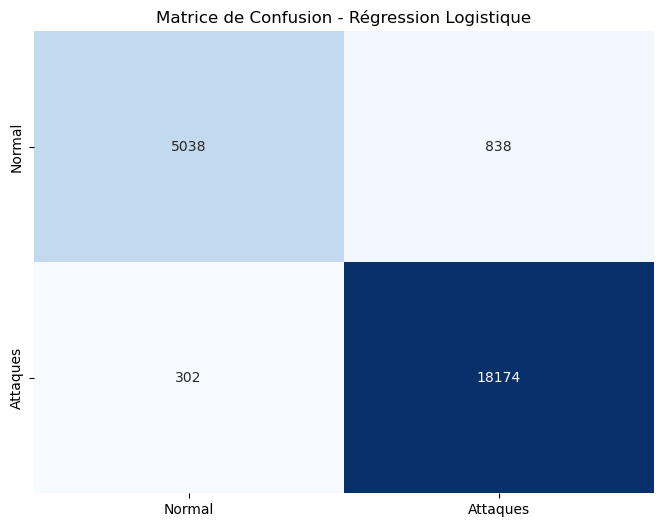

In [26]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show

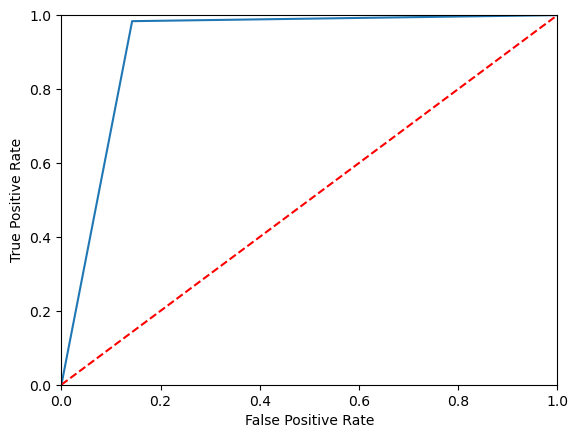

Area Under the Curve  0.9205202237598247


In [27]:
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', logistic_auc)

## 2. modele Random forest

In [28]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9956061103810775
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5876
           1       0.99      1.00      1.00     18476

    accuracy                           1.00     24352
   macro avg       1.00      0.99      0.99     24352
weighted avg       1.00      1.00      1.00     24352


Recall  0.9995670058454211
F1- Score   0.9971114650541264

Temps d'exécution Détection de primitives : 21.381096839904785 secondes


[[ 5777    99]
 [    8 18468]]


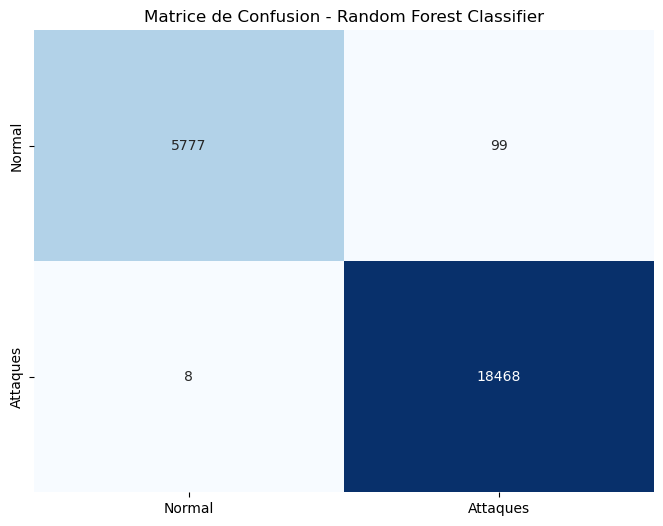

In [29]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.show()

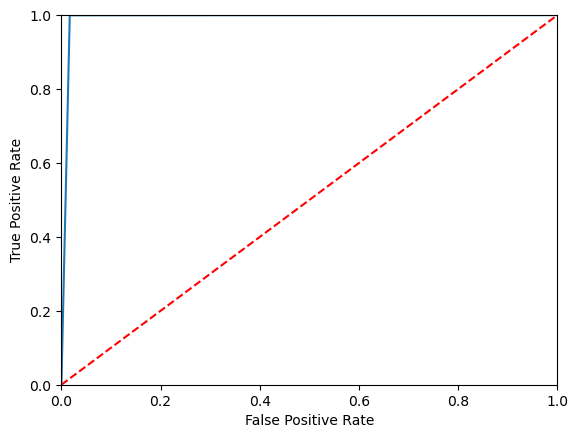

Area Under the Curve  0.9913594048968425


In [30]:
# Calculate AUC
RandomForest_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', RandomForest_auc)

## 3. modele Decision Tree

In [31]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the decision tree
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
# Predict on the test set
DecisionTree_pred = DecisionTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
report = classification_report(y_test, DecisionTree_pred)
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9956471747700394
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       1.00      1.00      1.00     18476

    accuracy                           1.00     24352
   macro avg       0.99      0.99      0.99     24352
weighted avg       1.00      1.00      1.00     24352


Recall  0.9978350292271054
F1- Score   0.9971334306885176

Temps d'exécution Détection de primitives : 1.249690055847168 secondes


[[ 5810    66]
 [   40 18436]]


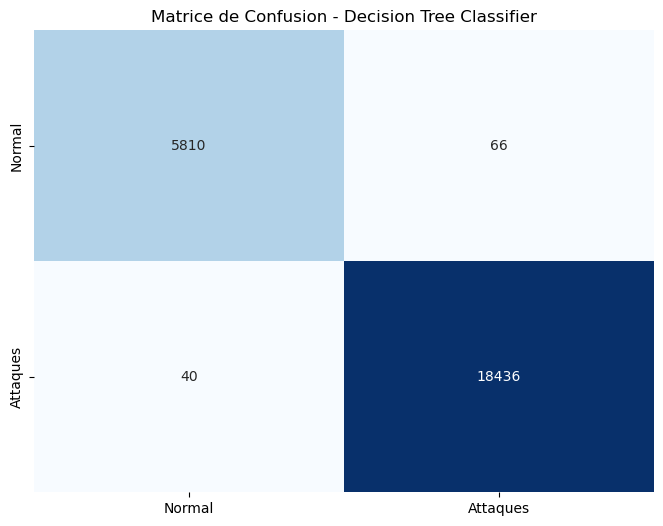

In [32]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Decision Tree Classifier')
plt.show()

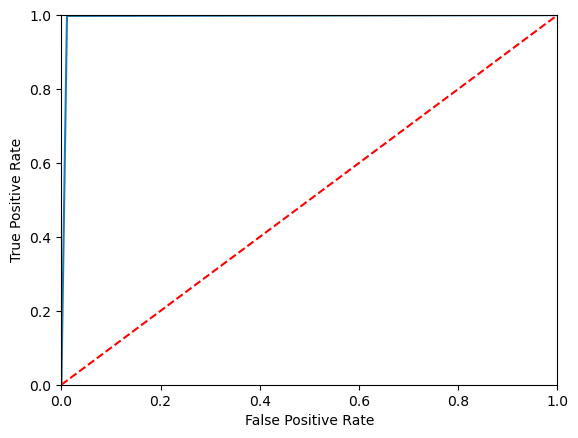

Area Under the Curve  0.9933014492629741


In [33]:
# Calculate AUC
DecisionTree_auc = roc_auc_score(y_test, DecisionTree_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, DecisionTree_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % DecisionTree_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', DecisionTree_auc)

## 4. Modele Support Vector Machines

### fonction rbf

In [25]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.8398078186596584
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.39      0.54      5876
           1       0.84      0.98      0.90     18476

    accuracy                           0.84     24352
   macro avg       0.86      0.69      0.72     24352
weighted avg       0.85      0.84      0.82     24352


Recall  0.9826802338168434
F1- Score   0.902991569890334

Temps d'exécution Détection de primitives : 385.13146591186523 secondes


[[ 2295  3581]
 [  320 18156]]


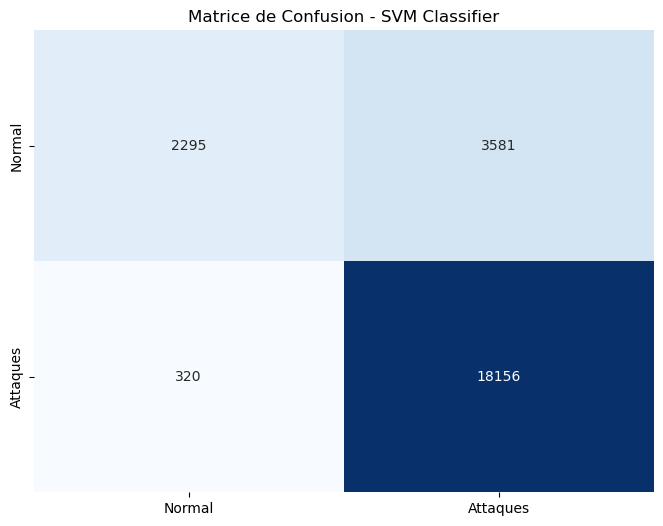

In [26]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

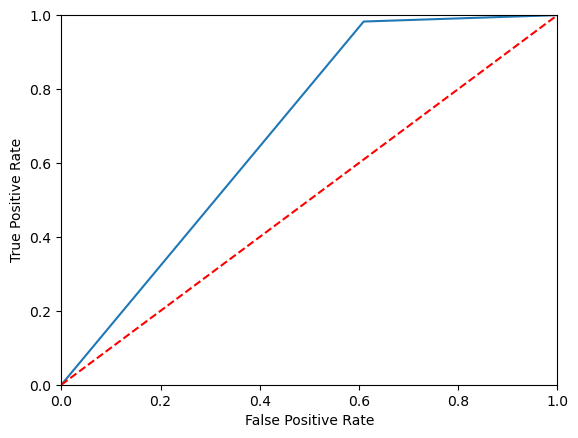

Area Under the Curve  0.6866260256899057


In [27]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

### fonction linéaire 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with linear kernel
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


In [ ]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

In [ ]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

### fonction polynomial 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with polynomial kernel
SVM = SVC(kernel='poly', degree=3)  
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


In [ ]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

In [ ]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

### fonction sigmoïde 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with sigmoid kernel
SVM = SVC(kernel='sigmoid')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


In [ ]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

In [ ]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

## 5. modele XGBCLASSIFIER

In [25]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9978646517739816
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5876
           1       1.00      1.00      1.00     18476

    accuracy                           1.00     24352
   macro avg       1.00      1.00      1.00     24352
weighted avg       1.00      1.00      1.00     24352


Recall  0.9989175146135527
F1- Score   0.9985932258413592

Temps d'exécution Détection de primitives : 3.0099434852600098 secondes


[[ 5844    32]
 [   20 18456]]


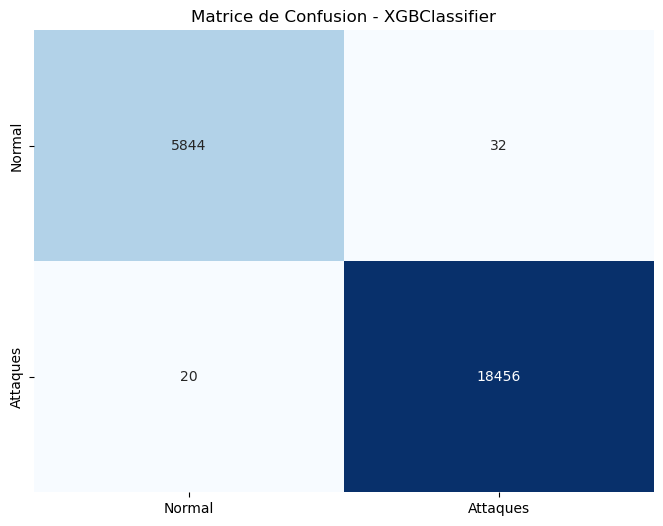

In [26]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - XGBClassifier')
plt.show()

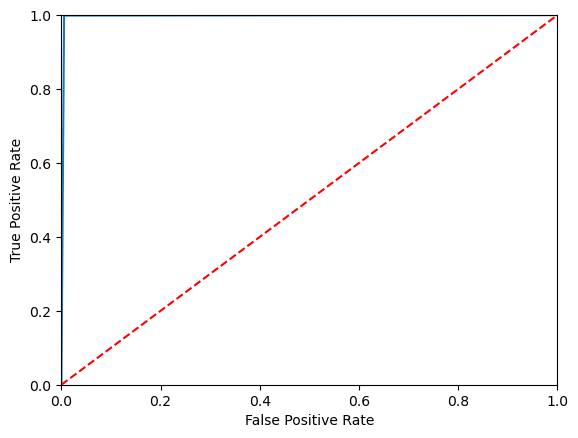

Area Under the Curve  0.9967358165307382


In [27]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, xgb_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)


# Exemple

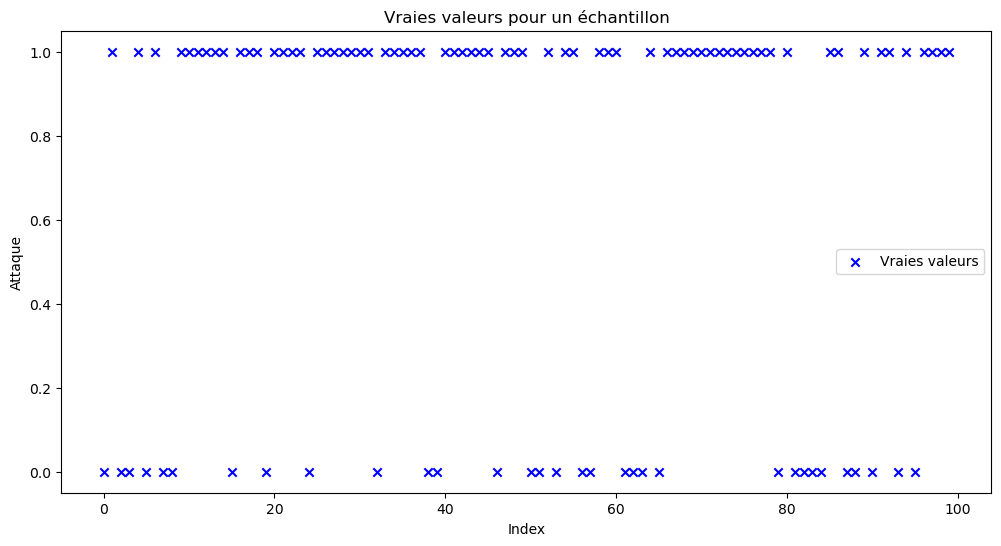

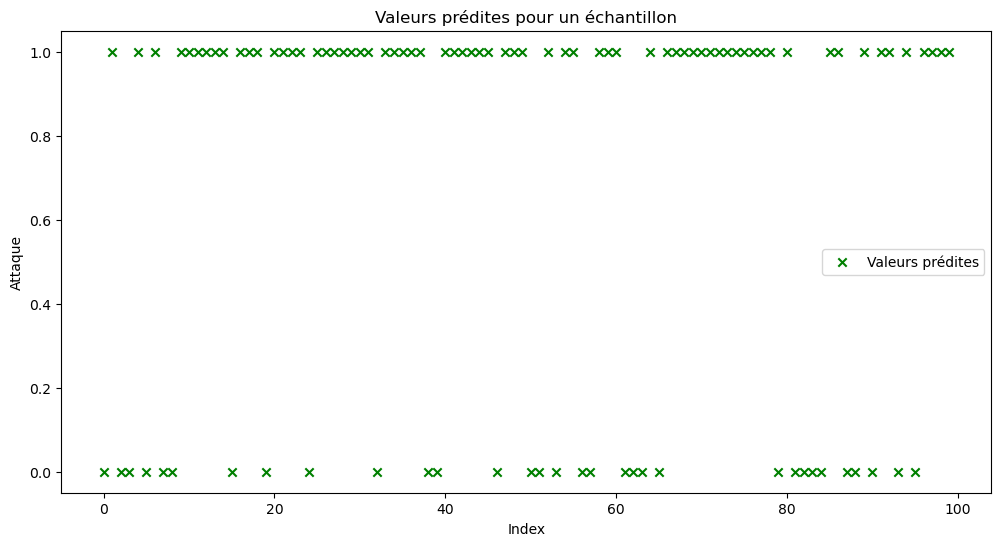

In [31]:
# Sélectionner un échantillon aléatoire de 1000 lignes
random_sample = train.sample(n=100, random_state=42)
# Séparer les caractéristiques (X) et la variable cible (y)
X_sample = random_sample.drop("label", axis=1)
y_sample = random_sample["label"]

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_all = xgb_model.predict(X_test)

# Ajouter les colonnes des prédictions au DataFrame de l'ensemble de test
df_test_predictions = X_test.copy()
df_test_predictions['Real'] = y_test
df_test_predictions['Predictions_XGBClassifier'] = y_pred_all
# Sélectionner un échantillon aléatoire de 300 lignes dans l'ensemble de test
random_subset = df_test_predictions.sample(n=100, random_state=42)
# Plot pour les vraies valeurs
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Real'], label='Vraies valeurs', marker='x', color='blue')
plt.title('Vraies valeurs pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()
# Plot pour les valeurs prédites
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Predictions_XGBClassifier'], label='Valeurs prédites', marker='x', color='green')
plt.title('Valeurs prédites pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()

# Comparaison 

comparaison valeur accuracy


<BarContainer object of 5 artists>

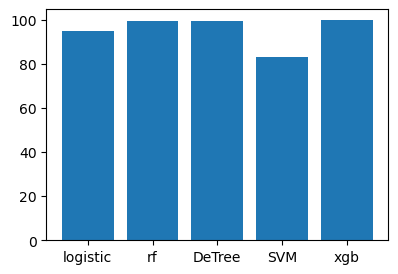

In [28]:
print ("comparaison valeur accuracy")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [95, 99.56061, 99.56471, 83, 99.7] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

comparaison temps d'execution


<BarContainer object of 5 artists>

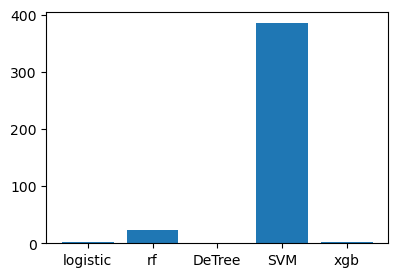

In [29]:
print ("comparaison temps d'execution")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [2.55, 23.38, 1.108, 385, 1.585] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

comparaison valeur cur


<BarContainer object of 5 artists>

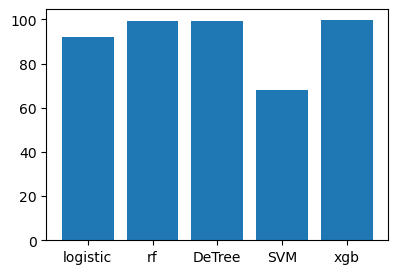

In [30]:
print ("comparaison valeur cur")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [92, 99.1, 99.3, 68, 99.6] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

# Reduction nombre colonnes

                         id       dur     proto   service     state     spkts  \
id                 1.000000 -0.063699  0.496309 -0.421501  0.798206 -0.050541   
dur               -0.063699  1.000000 -0.137649  0.136053 -0.014010  0.440399   
proto              0.496309 -0.137649  1.000000 -0.794079  0.510644 -0.116118   
service           -0.421501  0.136053 -0.794079  1.000000 -0.403587  0.179920   
state              0.798206 -0.014010  0.510644 -0.403587  1.000000 -0.084827   
spkts             -0.050541  0.440399 -0.116118  0.179920 -0.084827  1.000000   
dpkts             -0.097639  0.343983 -0.156818  0.158224 -0.102949  0.355456   
sbytes            -0.013208  0.389105 -0.068392  0.131575 -0.061473  0.984246   
dbytes            -0.061330  0.260062 -0.097218  0.071487 -0.062601  0.146293   
rate               0.488932 -0.124107  0.524256 -0.415082  0.561946 -0.062798   
sttl               0.785837 -0.069756  0.560484 -0.506736  0.799361 -0.070783   
dttl              -0.200941 

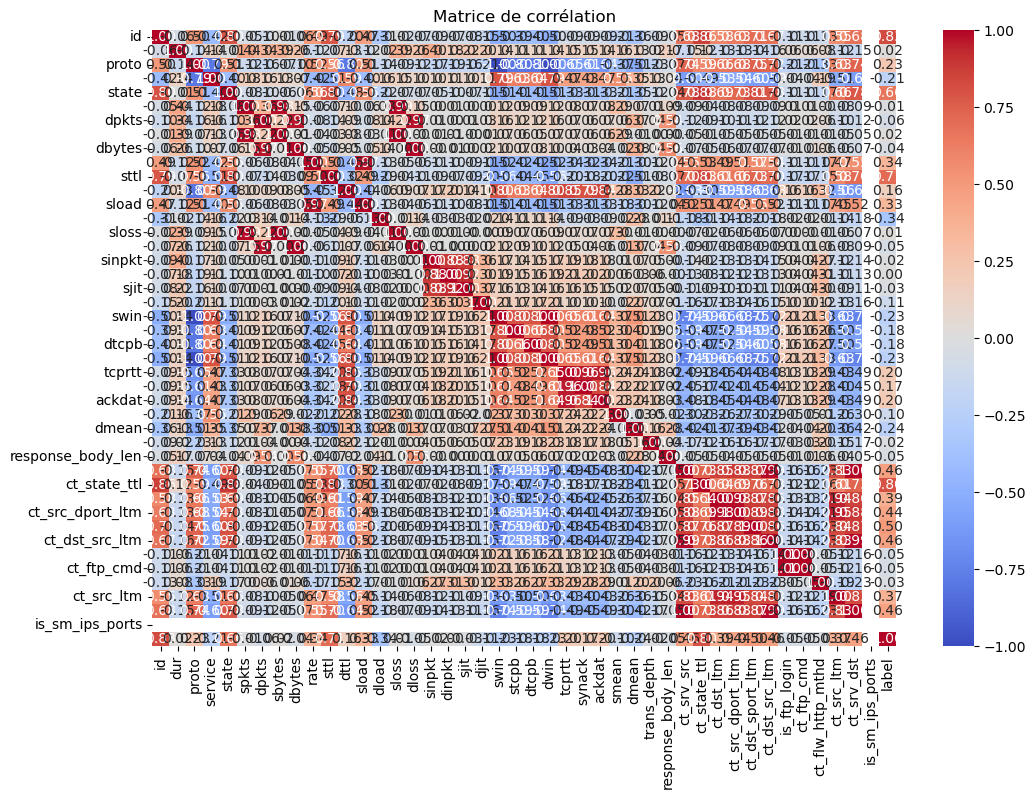

In [26]:
# Calculer la matrice de corrélation
correlation_matrix = train.corr()
# Afficher la matrice de corrélation
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [42]:
# Définir le seuil de corrélation
threshold = 0.2

# Extraire les colonnes ayant une corrélation absolue supérieure au seuil avec la variable cible
target_correlation = correlation_matrix['label'].abs()
relevant_features = target_correlation[target_correlation > threshold]

# Sélectionner les colonnes pertinentes
relevant_columns = relevant_features.index.tolist()

# Calculer les colonnes à supprimer
columns_to_drop = [col for col in train.columns if col not in relevant_columns]

# Supprimer les colonnes non pertinentes
data_filtered = train.drop(columns=columns_to_drop)

# Afficher les colonnes sélectionnées
print("Colonnes sélectionnées :\n", relevant_columns)
print("\nColonnes supprimées :\n", columns_to_drop)

# Afficher les premières lignes du DataFrame filtré
print("\nDataFrame filtré :\n", data_filtered.head())

Colonnes sélectionnées :
 ['id', 'proto', 'service', 'state', 'rate', 'sttl', 'sload', 'dload', 'swin', 'dwin', 'ackdat', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'label']

Colonnes supprimées :
 ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dttl', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'smean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports']

DataFrame filtré :
     id  proto  service  state           rate  sttl         sload  \
3    4      0        2      1      13.677108    62  2.740179e+03   
11  12      0        8      1      42.520967    62  2.118251e+05   
15  16      1        9      2  500000.001300   254  2.760000e+08   
17  18      0        4      1      43.195886    62  1.573347e+04   
21  22      0        4      1      44.376468   254  2.127704e+04   

           dload

In [50]:
train.shape

(81173, 44)

In [49]:
data_filtered.shape

(81173, 21)

# XGBClassifier

In [43]:
#separation jeu d'entrainement et de test
X = data_filtered.drop(columns=['label'])
y = data_filtered['label'] 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
#MODELISATION
start = time.time()
start_time = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9977825229960579
[[ 5844    32]
 [   22 18454]]
Temps d'exécution Détection de primitives : 0.6840934753417969 secondes


# Logistic Regression

In [45]:
#MODELISATION
start = time.time()
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9619743758212878
[[ 5268   608]
 [  318 18158]]
Temps d'exécution Détection de primitives : 0.9330196380615234 secondes


# Random Forest

In [46]:
#MODELISATION
start = time.time()
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9956471747700394
[[ 5779    97]
 [    9 18467]]
Temps d'exécution Détection de primitives : 4.956331968307495 secondes


# Decision Tree

In [47]:
#MODELISATION
start = time.time()
start_time = time.time()
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9954829172141918
[[ 5792    84]
 [   26 18450]]
Temps d'exécution Détection de primitives : 0.17671990394592285 secondes


# SVM

In [48]:
#MODELISATION
start = time.time()
start_time = time.time()
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.7895450065703022
[[  945  4931]
 [  194 18282]]
Temps d'exécution Détection de primitives : 243.04487800598145 secondes


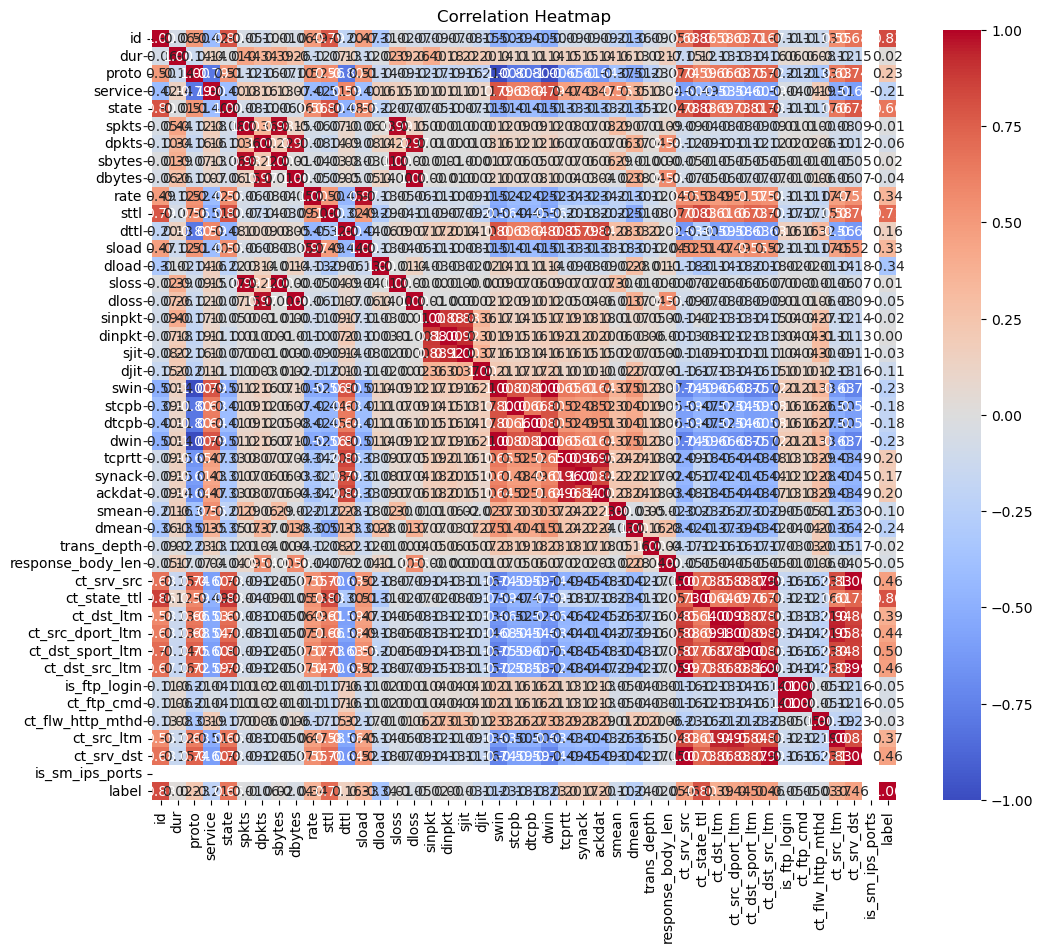

Colonnes sélectionnées :
 Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

Colonnes supprimées :
 []

DataFrame filtré :
     id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
3    4  1.681642      0        2      1     12     12     628     770   
11  12  2.093085      0        8      1     62     28   56329    2212   
15  16  0.000002      1        9      2      2      0     138       0   
17  18  0.393556      0        4      1     10      8

In [26]:
# Calculer la matrice de corrélation
corr_matrix = train.corr()

# Visualiser la carte de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Sélectionner les colonnes les plus importantes (par exemple, celles avec une corrélation absolue supérieure à 0.2)
important_columns = corr_matrix[abs(corr_matrix) > 0.2].sum().dropna().index

# Calculer les colonnes à supprimer
columns_to_drop = [col for col in train.columns if col not in important_columns]

# Supprimer les colonnes non pertinentes
data = train.drop(columns=columns_to_drop)

# Afficher les colonnes sélectionnées
print("Colonnes sélectionnées :\n", important_columns)
print("\nColonnes supprimées :\n", columns_to_drop)

# Afficher les premières lignes du DataFrame filtré
print("\nDataFrame filtré :\n", data.head())

In [28]:
#separation jeu d'entrainement et de test
X = data.drop(columns=['label'])
y = data['label'] 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
#MODELISATION
start = time.time()
start_time = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9978646517739816
[[ 5844    32]
 [   20 18456]]
Temps d'exécution Détection de primitives : 1.2111148834228516 secondes


In [29]:
#MODELISATION
start = time.time()
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9531865965834428
[[ 5038   838]
 [  302 18174]]
Temps d'exécution Détection de primitives : 0.8259556293487549 secondes


In [30]:
#MODELISATION
start = time.time()
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9956061103810775
[[ 5777    99]
 [    8 18468]]
Temps d'exécution Détection de primitives : 6.669884920120239 secondes


In [31]:
#MODELISATION
start = time.time()
start_time = time.time()
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9956471747700394
[[ 5810    66]
 [   40 18436]]
Temps d'exécution Détection de primitives : 0.38328099250793457 secondes


In [32]:
#MODELISATION
start = time.time()
start_time = time.time()
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.8398078186596584
[[ 2295  3581]
 [  320 18156]]
Temps d'exécution Détection de primitives : 3159.239596605301 secondes
